In [ ]:
pip install sklearn

**Import library**

In [ ]:
import pandas as pd
import math
import numpy as np
import random as ra
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files, drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Kata Unik (Tidak Duplikat)**

In [ ]:
#Ekstraksi Kata Unik
def term(text):
  hasil=[]
  for i in text:
    for j in i.split():
      if j not in hasil:
        hasil.append(j)
  return hasil

**term frequency (tf)**

In [ ]:
#Menghitung frekuensi kemunculan kata per dokumen aka term frequency (tf)
def termfrequency(text,term):
  hasil = []
  text = [i.split() for i in text]
  for i in range(len(text)):
    hasil.append([])
    for j in range(len(term)):
      hasil[i].append(text[i].count(term[j]))
  return hasil

**Backpropagation**

In [ ]:
#Fungsi Inisialisasi Bobot
def weight(n_input,n_hidden,n_output):
  beta = 0.7 * (n_output**(1/n_input))
  #Hidden Layer
  hidden = []
  for i in range(n_hidden):
    hidden.append([])
    vector = 0
    for j in range(n_input):
      rand = ra.uniform(-0.5,0.5)
      hidden[i].append(rand)
      vector += rand**2
    hidden[i] = [(beta*y)/math.sqrt(vector) for y in hidden[i]]
  
  #Output Layer
  output = []
  for i in range(n_output):
    output.append([])
    for j in range(n_hidden):
      rand = ra.uniform(-0.5,0.5)
      output[i].append(rand)
  
  return hidden,output

In [ ]:
#Fungsi Inisialisasi Bias
def bias(n_hidden,n_output):
  #Hidden Layer
  hidden = []
  for i in range(n_hidden):
    rand = ra.uniform(-0.5,0.5)
    hidden.append(rand)
  
  #Output Layer
  output = []
  for i in range(n_output):
    rand = ra.uniform(-0.5,0.5)
    output.append(rand)
  
  return hidden,output

In [ ]:
#Aktivasi
#Sigmoid
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#Turunan Sigmoid
def derivative_sigmoid(x):
  return sigmoid(x)*(1.0-sigmoid(x))

In [ ]:
#Forward Propagation
def forward(termfreqTrain,w_hidden,w_output,b_hidden,b_output):
  #Hidden Layer
  in_hidden = np.add(np.dot(w_hidden,termfreqTrain.T),b_hidden)
  out_hidden = sigmoid(in_hidden)
  #Output Layer
  in_output = np.add(np.dot(w_output,out_hidden),b_output)
  out_output = sigmoid(in_output)
  return out_output,in_output,out_hidden,in_hidden

In [ ]:
#Fungsi Error Checking
def error_check_output(or_label,in_output,out_output):
  return np.multiply(np.subtract(or_label,out_output),derivative_sigmoid(in_output))

def error_hidden(err_output,w_output):
  return np.dot(err_output,w_output)

def error_check_hidden(checkpoint_error_hidden,in_hidden):
  return np.multiply(checkpoint_error_hidden,derivative_sigmoid(in_hidden))

In [ ]:
#Fungsi Delta
#Delta Bobot Output Layer
def delta_bobot_output(alpha,err_output,out_hidden):
  return (np.outer(err_output,out_hidden))*alpha

#Delta Bias Output Layer
def delta_bias_output(alpha,err_output):
  return err_output*alpha

#Delta Bobot Hidden Layer
def delta_bobot_hidden(alpha,err_hidden,input):
  return (np.outer(err_hidden,input))*alpha

#Delta Bias Output Layer
def delta_bias_hidden(alpha,err_hidden):
  return err_hidden*alpha

In [ ]:
#Back Propagation
def backward(label,input,alpha,out_output,in_output,out_hidden,in_hidden):
  #Output Layer Error Checking 
  err_output = error_check_output(label,in_output,out_output)
  #Cek Delta Bobot Output Layer
  deltaWeightOutput = delta_bobot_output(alpha,err_output,out_hidden)
  #Cek Delta Bias Output Layer
  deltaBiasOutput = delta_bias_output(alpha,err_output)
  #Error Check Point dari Output Layer ke Hidden Layer
  checkpoint_error_hidden = error_hidden(err_output,w_output)
  #Hidden Layer Error Checking 
  err_hidden = error_check_hidden(checkpoint_error_hidden,in_hidden)
  #Cek Delta Bobot Hidden Layer
  deltaWeightHidden = delta_bobot_hidden(alpha,err_hidden,input)
  #Cek Delta Bias Hidden Layer
  deltaBiasHidden = delta_bias_hidden(alpha,err_hidden)
  return deltaWeightOutput,deltaBiasOutput,deltaWeightHidden,deltaBiasHidden

In [ ]:
#Update Weight & Bias
def update(w_hidden,w_output,b_hidden,b_output,deltaWeightOutput,deltaBiasOutput,deltaWeightHidden,deltaBiasHidden):
  #Update Output Layer Weight
  upWeightOutput = w_output+deltaWeightOutput
  #Update Output Layer Bias
  upBiasOutput = b_output+deltaBiasOutput
  #Update Hidden Layer Weight
  upWeightHidden = w_hidden+deltaWeightHidden
  #Update Hidden Layer Bias
  upBiasHidden = b_hidden+deltaBiasHidden
  return upWeightOutput,upBiasOutput,upWeightHidden,upBiasHidden

In [ ]:
#Training
def training(epochs,data_train,train_label,w_hidden,w_output,b_hidden,b_output,alpha):
  w_output,b_output,w_hidden,b_hidden=w_output,b_output,w_hidden,b_hidden
  for epoch in range(epochs):
    for input,label in zip(data_train,train_label) :
      #Forward Propagation
      out_output,in_output,out_hidden,in_hidden = forward(input,w_hidden,w_output,b_hidden,b_output)
      if (out_output!=label).all:
        #Backward Propagation
        deltaWeightOutput,deltaBiasOutput,deltaWeightHidden,deltaBiasHidden = backward(label,input,alpha,out_output,in_output,out_hidden,in_hidden)
        #Update Weight
        upWeightOutput,upBiasOutput,upWeightHidden,upBiasHidden = update(w_hidden,w_output,b_hidden,b_output,deltaWeightOutput,deltaBiasOutput,deltaWeightHidden,deltaBiasHidden)
        w_output,b_output,w_hidden,b_hidden=upWeightOutput,upBiasOutput,upWeightHidden,upBiasHidden
    #print('epoch: ', epoch)
  return w_output,b_output,w_hidden,b_hidden

In [ ]:
#Testing
def test(data_test,test_label,w_output,b_output,w_hidden,b_hidden):
  hasil = []
  for input in data_test:
    #Forward Propagation
    out_output,in_output,out_hidden,in_hidden = forward(input,w_hidden,w_output,b_hidden,b_output)
    out_output = oneHotFinal(out_output)
    hasil.append(out_output)
    #Cek Akurasi
  confusionMatrix(np.array(hasil),test_label)

In [ ]:
#One Hot Encode Label Test
def oneHotFinal(out_output):
    if (out_output[0]<out_output[1]):
        out_output = [0,1]
    elif (out_output[0]>out_output[1]):
        out_output = [1,0]
    return out_output

In [ ]:
#Akurasi
def confusionMatrix(hasil,test_label):
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(confusion_matrix(hasil.argmax(axis=1), test_label.argmax(axis=1)), annot=True, fmt=".0f", ax=ax)
  plt.xlabel("y_head")
  plt.ylabel("y_true")
  plt.show()
  print (classification_report(hasil, test_label))

**Membaca Dataset**

In [ ]:
#One Hot Encoder Label Dataset
def oneHotData(label):
    for i in range(len(label)):
        if label[i]==1:
            label[i]=[1,0]
        elif label[i]==0:
            label[i]=[0,1]
    return label

In [ ]:
#Dataset Training
path_dataset = '/content/gdrive/My Drive/Dataset/Sprint 2/Dataset 1/Preprocessing Training.xlsx'
df = pd.read_excel(path_dataset)

#Memisahkan Data dengan Label
x_train = df[r'Tweet'].values.tolist()
y_train = df[r'HS'].values.tolist()
y_train = np.array(oneHotData(y_train))

#Extract Term Unik
termTrain = term(x_train)

#Menghitung Frekuensi Kata di tiap Dokumen
termfreqTrain = np.array(termfrequency(x_train,termTrain))
#print(termTrain)
#print(len(termTrain))
#print(termfreqTrain)

In [ ]:
#Dataset Testing
path_dataset = '/content/gdrive/My Drive/Dataset/Sprint 2/Dataset 1/Preprocessing Testing.xlsx'
df = pd.read_excel(path_dataset)

#Memisahkan Data dengan Label
x_test = df[r'Tweet'].values.tolist()
y_test  = df[r'HS'].values.tolist()
y_test = np.array(oneHotData(y_test))

#Menghitung Frekuensi Kata di tiap Dokumen
termfreqTest = np.array(termfrequency(x_test,termTrain))
print(termfreqTest)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Testing**

In [ ]:
n_input = len(termTrain)
n_hidden = 200
n_output = 2
#Inisialisasi Bobot
w_hidden,w_output = weight(n_input,n_hidden,n_output)
w_hidden = np.array(w_hidden)
w_output = np.array(w_output)
#Inisialisasi Bias
b_hidden,b_output = bias(n_hidden,n_output)
b_hidden = np.array(b_hidden)
b_output = np.array(b_output)

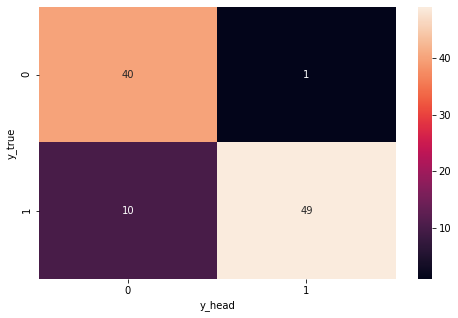

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.98      0.83      0.90        59

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.89      0.89       100
 samples avg       0.89      0.89      0.89       100



In [ ]:
#Shuffle dataset
termfreqTrain,y_train = shuffle(termfreqTrain,y_train,random_state=2)
#Parameter
training_epochs = 600
learning_rate = 0.1
#Train
w_output,b_output,w_hidden,b_hidden = training(training_epochs,termfreqTrain,y_train,w_hidden,w_output,b_hidden,b_output,learning_rate)
#Testing
test(termfreqTest,y_test,w_output,b_output,w_hidden,b_hidden)